How to Develop 1D Convolutional Neural Network Models for Human Activity Recognition

Below is an example video of a subject performing the activities while their movement data is being recorded.

The six activities performed were as follows:

Walking
Walking Upstairs
Walking Downstairs
Sitting
Standing
Laying

The movement data recorded was the x, y, and z accelerometer data (linear acceleration) and gyroscopic data (angular velocity) from the smart phone, specifically a Samsung Galaxy S II. Observations were recorded at 50 Hz (i.e. 50 data points per second). Each subject performed the sequence of activities twice, once with the device on their left-hand-side and once with the device on their right-hand side.

Pre-processing accelerometer and gyroscope using noise filters.
Splitting data into fixed windows of 2.56 seconds (128 data points) with 50% overlap.
Splitting of accelerometer data into gravitational (total) and body motion components.

<h1>Develop 1D Convolutional Neural Network</h1>

In [52]:
# multi-headed cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [53]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [54]:

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

In [55]:
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [56]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'C:/Users/Girish/Downloads/Jupyter notebooks/HARDataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'C:/Users/Girish/Downloads/Jupyter notebooks/HARDataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [57]:
def Model1(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    # head 1
    inputs1 = Input(shape=(n_timesteps,n_features))
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # head 2
    inputs2 = Input(shape=(n_timesteps,n_features))
    conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # head 3
    inputs3 = Input(shape=(n_timesteps,n_features))
    conv3 = Conv1D(filters=64, kernel_size=11, activation='relu')(inputs3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(100, activation='relu')(merged)
    outputs = Dense(n_outputs, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    return model


In [58]:
trainX, trainy, testX, testy=load_dataset()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [59]:
model=Model1(trainX, trainy, testX, testy)

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
history=model.fit([trainX,trainX,trainX],trainy,epochs=40,batch_size=183)

Epoch 1/40
7352/7352 [==============================] - 8s 1ms/step - loss: 0.6147 - accuracy: 0.7617
Epoch 2/40
7352/7352 [==============================] - 5s 701us/step - loss: 0.1779 - accuracy: 0.9372
Epoch 3/40
7352/7352 [==============================] - 5s 671us/step - loss: 0.1268 - accuracy: 0.9490
Epoch 4/40
7352/7352 [==============================] - 5s 648us/step - loss: 0.1148 - accuracy: 0.9504
Epoch 5/40
7352/7352 [==============================] - 5s 655us/step - loss: 0.1031 - accuracy: 0.9547
Epoch 6/40
7352/7352 [==============================] - 5s 660us/step - loss: 0.0996 - accuracy: 0.9570
Epoch 7/40
7352/7352 [==============================] - 5s 657us/step - loss: 0.1070 - accuracy: 0.9532
Epoch 8/40
7352/7352 [==============================] - 5s 695us/step - loss: 0.0979 - accuracy: 0.9555
Epoch 9/40
7352/7352 [==============================] - 5s 691us/step - loss: 0.1075 - accuracy: 0.9558
Epoch 10/40
7352/7352 [==============================] - 5s 747us/

In [62]:
preds = model.evaluate([testX,testX,testX],testy)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2947/2947 [==============================] - 1s 348us/step
Loss = 0.34041046722259455
Test Accuracy = 0.9236511588096619


In [63]:
import matplotlib.pyplot as plt

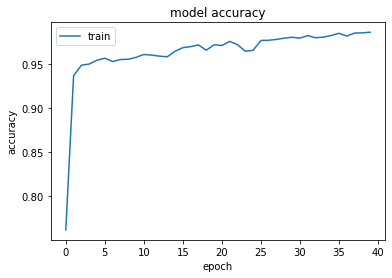

In [65]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

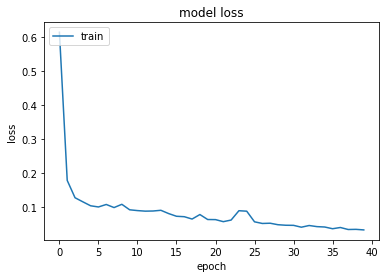

In [66]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()